In [1]:
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

In [2]:
ticker = yf.Ticker("^NSEI")

In [3]:
nif = ticker.history(period="max")

In [4]:
nif["Volume"] = nif["Volume"].astype(float)

In [5]:
nifty = nif.loc[nif["Volume"] > 0]

<Axes: xlabel='Date'>

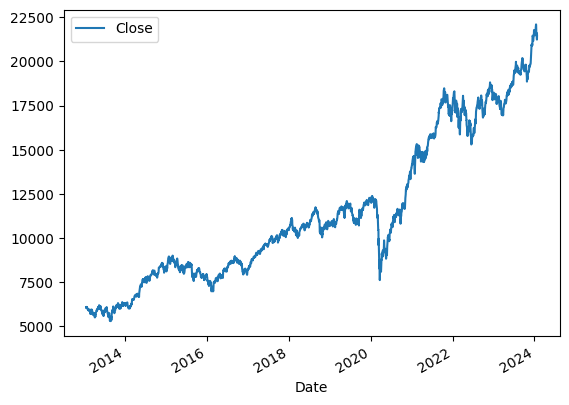

In [6]:
nifty.plot.line(y="Close", use_index=True)

In [7]:
del nifty["Dividends"]
del nifty["Stock Splits"]

In [8]:
nifty["Tomorrow"] = nifty["Close"].shift(-1)
nifty

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2013-01-21 00:00:00+05:30,6085.750000,6094.350098,6065.100098,6082.299805,130900.0,6048.500000
2013-01-22 00:00:00+05:30,6080.149902,6101.299805,6040.500000,6048.500000,129000.0,6054.299805
2013-01-23 00:00:00+05:30,6052.850098,6069.799805,6021.149902,6054.299805,137000.0,6019.350098
2013-01-24 00:00:00+05:30,6046.200195,6065.299805,6007.850098,6019.350098,185200.0,6074.649902
2013-01-25 00:00:00+05:30,6024.500000,6080.549805,6014.450195,6074.649902,147600.0,6074.799805
...,...,...,...,...,...,...
2024-01-17 00:00:00+05:30,21647.250000,21851.500000,21550.449219,21571.949219,456000.0,21462.250000
2024-01-18 00:00:00+05:30,21414.199219,21539.400391,21285.550781,21462.250000,387300.0,21622.400391
2024-01-19 00:00:00+05:30,21615.199219,21670.599609,21575.000000,21622.400391,343100.0,21238.800781


In [9]:
nifty["Target"] = (nifty["Tomorrow"] > nifty["Close"]).astype(int).copy()
nifty

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2013-01-21 00:00:00+05:30,6085.750000,6094.350098,6065.100098,6082.299805,130900.0,6048.500000,0
2013-01-22 00:00:00+05:30,6080.149902,6101.299805,6040.500000,6048.500000,129000.0,6054.299805,1
2013-01-23 00:00:00+05:30,6052.850098,6069.799805,6021.149902,6054.299805,137000.0,6019.350098,0
2013-01-24 00:00:00+05:30,6046.200195,6065.299805,6007.850098,6019.350098,185200.0,6074.649902,1
2013-01-25 00:00:00+05:30,6024.500000,6080.549805,6014.450195,6074.649902,147600.0,6074.799805,1
...,...,...,...,...,...,...,...
2024-01-17 00:00:00+05:30,21647.250000,21851.500000,21550.449219,21571.949219,456000.0,21462.250000,0
2024-01-18 00:00:00+05:30,21414.199219,21539.400391,21285.550781,21462.250000,387300.0,21622.400391,1
2024-01-19 00:00:00+05:30,21615.199219,21670.599609,21575.000000,21622.400391,343100.0,21238.800781,0


In [10]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
train = nifty.iloc[:-100]
test = nifty.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [11]:
from sklearn.metrics import precision_score
import pandas as pd 

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
preds

Date
2023-08-28 00:00:00+05:30    1
2023-08-29 00:00:00+05:30    1
2023-08-30 00:00:00+05:30    1
2023-08-31 00:00:00+05:30    1
2023-09-01 00:00:00+05:30    1
                            ..
2024-01-17 00:00:00+05:30    0
2024-01-18 00:00:00+05:30    0
2024-01-19 00:00:00+05:30    0
2024-01-23 00:00:00+05:30    0
2024-01-24 00:00:00+05:30    0
Length: 100, dtype: int32

In [12]:
precision_score(test["Target"], preds)

0.5901639344262295

In [13]:
combined = pd.concat([test["Target"], preds], axis=1)
combined

,Target,0
Date,,
2023-08-28 00:00:00+05:30,1,1
2023-08-29 00:00:00+05:30,1,1
2023-08-30 00:00:00+05:30,0,1
2023-08-31 00:00:00+05:30,1,1
2023-09-01 00:00:00+05:30,1,1
...,...,...
2024-01-17 00:00:00+05:30,0,0
2024-01-18 00:00:00+05:30,1,0
2024-01-19 00:00:00+05:30,0,0


<Axes: xlabel='Date'>

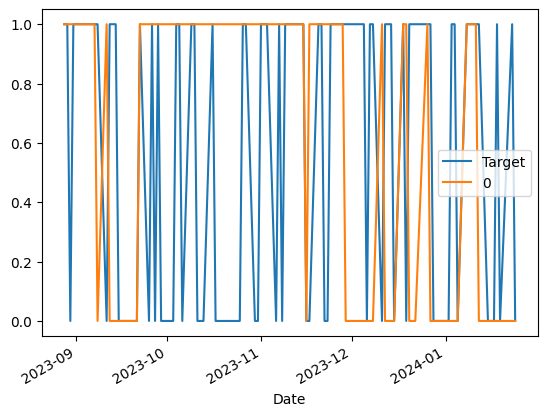

In [14]:
combined.plot()

In [15]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined
    

In [16]:
def backtest(data, model, predictors, start=253, step=63):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[:i]
        test = data.iloc[i:(i+step)]
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
        
    return pd.concat(all_predictions)

In [17]:
predictions = backtest(nifty, model, predictors)

In [18]:
predictions["Predictions"].value_counts()

Predictions
0    1237
1    1190
Name: count, dtype: int64

In [19]:
predictions

,Target,Predictions
Date,,
2014-01-29 00:00:00+05:30,0,0
2014-01-30 00:00:00+05:30,1,0
2014-01-31 00:00:00+05:30,0,0
2014-02-03 00:00:00+05:30,0,1
2014-02-04 00:00:00+05:30,1,0
...,...,...
2024-01-17 00:00:00+05:30,0,1
2024-01-18 00:00:00+05:30,1,1
2024-01-19 00:00:00+05:30,0,1


In [20]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5201680672268908

In [21]:
predictions["Target"].value_counts()/predictions.shape[0]

Target
1    0.542645
0    0.457355
Name: count, dtype: float64

In [22]:
horizons = [2, 5, 63, 250]
new_predictors = []

for horizon in horizons:
    rolling_averages = nifty.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    nifty[ratio_column] = nifty["Close"]/ rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    
    nifty[trend_column] = nifty.shift(1).rolling(horizon).sum()["Target"]
    new_predictors += [ratio_column, trend_column]
    
    

In [23]:
new_predictors

['Close_Ratio_2',
 'Trend_2',
 'Close_Ratio_5',
 'Trend_5',
 'Close_Ratio_63',
 'Trend_63',
 'Close_Ratio_250',
 'Trend_250']

In [24]:
nifty

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_63,Trend_63,Close_Ratio_250,Trend_250
Date,,,,,,,,,,,,,,,
2013-01-21 00:00:00+05:30,6085.750000,6094.350098,6065.100098,6082.299805,130900.0,6048.500000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-22 00:00:00+05:30,6080.149902,6101.299805,6040.500000,6048.500000,129000.0,6054.299805,1,0.997214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-23 00:00:00+05:30,6052.850098,6069.799805,6021.149902,6054.299805,137000.0,6019.350098,0,1.000479,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-24 00:00:00+05:30,6046.200195,6065.299805,6007.850098,6019.350098,185200.0,6074.649902,1,0.997105,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-25 00:00:00+05:30,6024.500000,6080.549805,6014.450195,6074.649902,147600.0,6074.799805,1,1.004572,1.0,1.003109,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-17 00:00:00+05:30,21647.250000,21851.500000,21550.449219,21571.949219,456000.0,21462.250000,0,0.989443,0.0,0.987334,3.0,1.054527,38.0,1.131987,144.0
2024-01-18 00:00:00+05:30,21414.199219,21539.400391,21285.550781,21462.250000,387300.0,21622.400391,1,0.997451,0.0,0.983979,2.0,1.047758,38.0,1.125437,143.0
2024-01-19 00:00:00+05:30,21615.199219,21670.599609,21575.000000,21622.400391,343100.0,21238.800781,0,1.003717,1.0,0.993801,2.0,1.054097,38.0,1.132954,144.0


In [25]:
nifty = nifty.dropna()

In [26]:
nifty

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_63,Trend_63,Close_Ratio_250,Trend_250
Date,,,,,,,,,,,,,,,
2014-01-24 00:00:00+05:30,6301.649902,6331.450195,6263.899902,6266.750000,160300.0,6135.850098,0,0.993744,1.0,0.992545,4.0,1.009972,28.0,1.056632,122.0
2014-01-27 00:00:00+05:30,6186.299805,6188.549805,6130.250000,6135.850098,190400.0,6126.250000,0,0.989446,0.0,0.977015,3.0,0.988947,28.0,1.034501,122.0
2014-01-28 00:00:00+05:30,6131.850098,6163.600098,6085.950195,6126.250000,184100.0,6120.250000,0,0.999217,0.0,0.981348,2.0,0.987447,28.0,1.032832,121.0
2014-01-29 00:00:00+05:30,6161.000000,6170.450195,6109.799805,6120.250000,146700.0,6073.700195,0,0.999510,0.0,0.987304,1.0,0.986432,28.0,1.031750,121.0
2014-01-30 00:00:00+05:30,6067.000000,6082.850098,6027.250000,6073.700195,208100.0,6089.500000,1,0.996183,0.0,0.988468,0.0,0.979298,27.0,1.023903,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-16 00:00:00+05:30,22080.500000,22124.150391,21969.800781,22032.300781,292400.0,21571.949219,0,0.998524,1.0,1.007972,4.0,1.078555,38.0,1.157046,144.0
2024-01-17 00:00:00+05:30,21647.250000,21851.500000,21550.449219,21571.949219,456000.0,21462.250000,0,0.989443,0.0,0.987334,3.0,1.054527,38.0,1.131987,144.0
2024-01-18 00:00:00+05:30,21414.199219,21539.400391,21285.550781,21462.250000,387300.0,21622.400391,1,0.997451,0.0,0.983979,2.0,1.047758,38.0,1.125437,143.0


In [27]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [28]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= 0.6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined
    

In [29]:
predictions = backtest(nifty, model, new_predictors)

In [30]:
predictions["Predictions"].value_counts()

Predictions
0.0    1615
1.0     561
Name: count, dtype: int64

In [31]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5472370766488414

In [32]:
predictions

,Target,Predictions
Date,,
2015-02-13 00:00:00+05:30,1,1.0
2015-02-16 00:00:00+05:30,1,1.0
2015-02-18 00:00:00+05:30,1,1.0
2015-02-19 00:00:00+05:30,0,1.0
2015-02-20 00:00:00+05:30,0,0.0
...,...,...
2024-01-16 00:00:00+05:30,0,0.0
2024-01-17 00:00:00+05:30,0,0.0
2024-01-18 00:00:00+05:30,1,0.0


In [33]:
predictions.to_csv("../csv/trend.csv")